In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import re

In [2]:
def load_texts_from_file(file_path):
    """
    Charge les textes depuis un fichier .txt et les renvoie sous forme de liste.
    Chaque ligne du fichier est supposée être un texte séparé.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        texts = file.readlines()
    texts = [text.strip() for text in texts if text.strip()]  # Supprimer les lignes vides
    return texts

In [ ]:
def preprocess_text(text):
    """
    Applique un prétraitement de base aux textes : suppression des caractères spéciaux, ponctuation, etc.
    """
    # Conversion en minuscule
    text = text.lower()

    # Suppression des caractères non alphanumériques (sauf les espaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    return text

In [ ]:
# 3. Charger et nettoyer les textes
file_path = 'nips_clean.txt'  # Spécifiez le chemin du fichier
texts = load_texts_from_file(file_path)
#texts = [preprocess_text(text) for text in texts]

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')

In [6]:
def perform_clustering(texts, n_clusters=5):
    """
    Applique le clustering des textes à l'aide de l'algorithme K-Means.
    Renvoie les clusters formés.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Création d'un pipeline pour vectoriser et appliquer le clustering
    pipeline = make_pipeline(vectorizer, kmeans)

    # Entraînement du modèle de clustering
    pipeline.fit(texts)

    # Obtenir les labels (numéros de clusters) pour chaque texte
    labels = kmeans.labels_

    return pipeline, labels, kmeans

In [7]:
n_clusters = 5  # Nombre de clusters à créer
pipeline, labels, kmeans = perform_clustering(texts, n_clusters=n_clusters)


In [8]:
print("\n--- Résultats du clustering ---")
for idx, label in enumerate(labels):
    print(f"Texte {idx+1} (Cluster {label}): {texts[idx][:200]}...")  # Affichage des 200 premiers caractères



--- Résultats du clustering ---
Texte 1 (Cluster 4): up propagation is an algorithm for inverting and learning neural network generative models sensory input is processed by inverting a model that generates patterns from hidden variables using topdown c...
Texte 2 (Cluster 3): we have constructed an inexpensive video based motorized tracking system that learns to track a head . it uses real time graphical user inputs or an auxiliary infrared detector as supervisory signals ...
Texte 3 (Cluster 0): non negative matrix factorization has previously been shown to be a useful decomposition for multivariate data . two different multi plicative algorithms for nmf are analyzed . they differ only slight...
Texte 4 (Cluster 4): spike triggered averaging techniques are effective for linear characterization of neural responses . but neurons exhibit important nonlinear behaviors , such as gain control , that are not captured by...
Texte 5 (Cluster 1): we consider continuous state , continuous acti

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np

# Affichage des résultats du clustering
print("\n--- Résultats du clustering ---")


unique_labels = set(labels)
for label in unique_labels:
    print(f"\nCluster {label} :")
    # Affichage du nombre de textes dans le cluster
    cluster_texts = [texts[idx] for idx, lbl in enumerate(labels) if lbl == label]
    print(f"Nombre de textes dans ce cluster: {len(cluster_texts)}")

    # Affichage des 200 premiers caractères de chaque texte du cluster
    for idx, text in enumerate(cluster_texts[:3]):  # Limité à 3 textes pour la clarté
        print(f"  - Texte {idx + 1}: {text[:200]}...")

    # Extraction des mots-clés en utilisant TF-IDF
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    X = tfidf_vectorizer.fit_transform(cluster_texts)
    feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

    # Affichage des mots-clés les plus importants pour le cluster
    print("  Mots-clés du cluster : ", feature_names)



--- Résultats du clustering ---

Cluster 0 :
Nombre de textes dans ce cluster: 601
  - Texte 1: non negative matrix factorization has previously been shown to be a useful decomposition for multivariate data . two different multi plicative algorithms for nmf are analyzed . they differ only slight...
  - Texte 2: this contribution develops a theoretical framework that takes into account the effect of approximate optimization on learning algorithms . the analysis shows distinct tradeoffs for the case of small s...
  - Texte 3: we study the relation between notions of game theoretic equilibria which are based on stability under a set of deviations , and empirical equilibria which are reached by rational players . rational pl...
  Mots-clés du cluster :  ['algorithm' 'algorithms' 'convergence' 'convex' 'gradient' 'learning'
 'optimization' 'problem' 'regret' 'stochastic']

Cluster 1 :
Nombre de textes dans ce cluster: 368
  - Texte 1: we consider continuous state , continuous action batch 

In [10]:
def classify_new_text(pipeline, new_text):
    """
    Classe un nouveau texte dans l'un des clusters existants.
    """
    # Prédire le cluster du nouveau texte
    cluster = pipeline.predict([new_text])[0]
    print(f"Le texte appartient au cluster {cluster}.")


In [11]:
new_text = "We are developing a new method for non-linear reinforcement learning to optimize continuous action spaces."
print("\n--- Classification d'un nouveau texte ---")
classify_new_text(pipeline, new_text)



--- Classification d'un nouveau texte ---
Le texte appartient au cluster 1.


In [12]:
def print_top_terms_for_clusters(kmeans, vectorizer, n_words=10):
    """
    Affiche les n meilleurs termes pour chaque cluster formé.
    """
    print("\n--- Termes les plus importants par cluster ---")
    terms = vectorizer.get_feature_names_out()

    for i in range(kmeans.n_clusters):
        print(f"\nCluster {i}:")
        # Obtenir les indices des termes les plus significatifs pour chaque cluster
        order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
        top_terms = [terms[ind] for ind in order_centroids[i, :n_words]]
        print(", ".join(top_terms))

In [13]:
print_top_terms_for_clusters(kmeans, vectorizer)


--- Termes les plus importants par cluster ---

Cluster 0:
stochastic, regret, gradient, optimization, algorithm, convex, convergence, algorithms, online, problems

Cluster 1:
policy, learning, reinforcement, agent, reward, decision, policies, value, agents, function

Cluster 2:
algorithm, data, problem, learning, number, matrix, algorithms, method, clustering, based

Cluster 3:
networks, network, neural, number, image, deep, training, learning, model, images

Cluster 4:
model, models, inference, data, latent, variational, bayesian, learning, process, approach


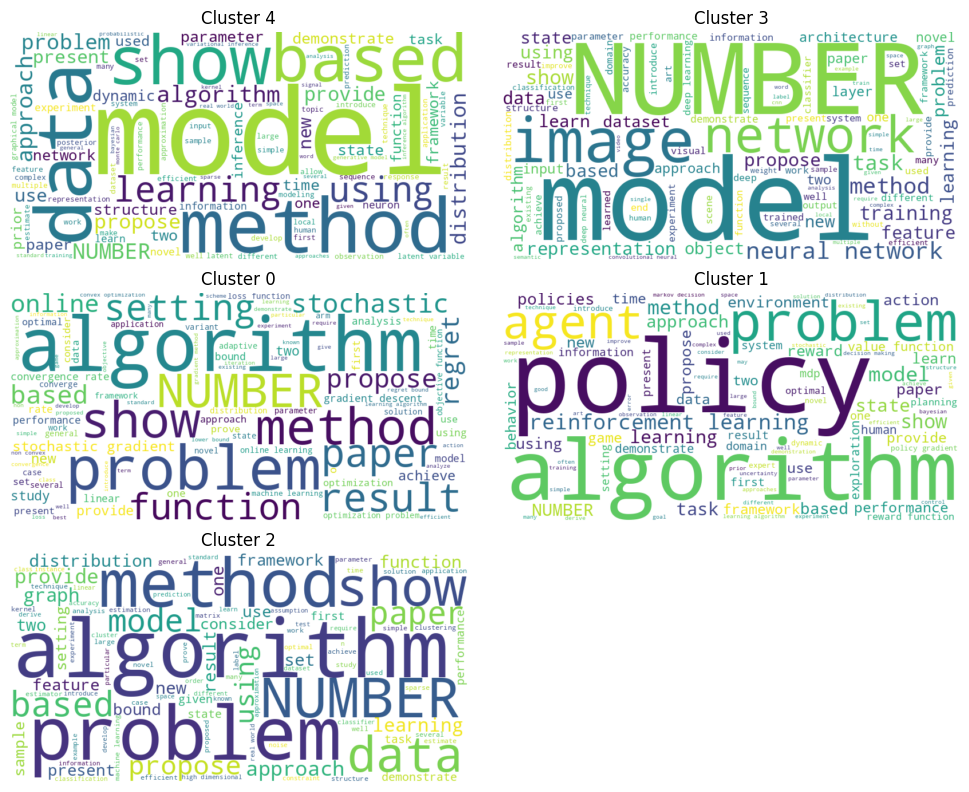

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Supposons que 'texts' contienne la liste des textes et 'labels' contiennent les labels des clusters

# Étape 1: Créer un dictionnaire pour stocker les textes de chaque cluster
cluster_texts = {}
for i, label in enumerate(labels):
    if label not in cluster_texts:
        cluster_texts[label] = []
    cluster_texts[label].append(texts[i])

# Étape 2: Générer et afficher le WordCloud pour chaque cluster
n_clusters = len(cluster_texts)
n_cols = 2  # Nombre de colonnes souhaité
n_rows = (n_clusters + n_cols - 1) // n_cols # Calcul du nombre de lignes nécessaire

plt.figure(figsize=(10, 8))
for i, (cluster, cluster_text) in enumerate(cluster_texts.items()):
    # Fusionner les textes du cluster en un seul texte
    text = ' '.join(cluster_text)

    # Créer le WordCloud pour ce cluster
    wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

    
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()